## **활성화 함수 Activation Function**


활성화 기능은 신경망의 중요한 구성 요소입니다. 이는 네트워크의 다른 계층에서 수신된 입력 신호에 수학적 변환을 적용하여 신경망의 출력을 결정하는 데 도움이 됩니다. 활성화 기능을 사용하면 입력 데이터 포인트와 출력 데이터 포인트 간의 복잡한 비선형 관계를 허용할 수 있습니다. 

어떤 기능이 적절한지 선택하는 것은 모델을 사용하여 해결하려는 문제와 하드웨어 기능 또는 시간/공간 제한으로 인한 제약에 따라 크게 달라집니다. 

신경망 활성화 함수 는 모델에 **비선형성**을 도입하는 함수입니다.


신경망은 각 계층에 여러 개의 노드를 갖고 있으며, **완전 연결 네트워크에서는 한 계층의 모든 노드가 다음 계층의 모든 노드에 연결됩니다.** 


예컨데, 두 번째 레이어의 첫 번째 뉴런 값을 계산하는 방법을 살펴보면, 첫 번째 레이어의 각 뉴런에 가중치를 곱하고(가중치는 훈련을 통해 학습함), 곱해진 값을 더하고, 그 합을 편향에 더합니다. **이 과정에서 편향도 학습하게 됩니다**.

#### 비유 
- 신경망이 호스라고 상상해 보면,

- 물을 취하고(일부 입력을 받음), 물을 어딘가로 운반하고(입력을 수정하고), 물을 밖으로 밀어냅니다(일부 출력을 생성함).

- 활성화 기능이 없으면 호스는 강철 파이프처럼  고정되고 유연하지 않게 작동합니다.  때로는 그것만으로도 충분합니다. 물을 공급하기 위해 파이프를 사용하는 데에는 아무런 문제가 없습니다.

- 단단한 강철 파이프(**신경망의 선형**)는 아무리 회전해도 맞지 않습니다. 활성화 함수는 함수를 더욱 유연하게 만들어주기 때문에 편리합니다.

- 이 경우 활성화 기능이 있는 신경망은 플라스틱 정원 호스처럼 작동합니다. 특정 요구 사항에 맞게 구부릴 수 있으며 강철 파이프로는 도달할 수 없는 훨씬 더 많은 장소로 물을 운반할 수 있습니다.

- 따라서 활성화 함수의 목적은 호스에 유연성(**신경망의 비선형성**)을 추가하는 것입니다.

#### 활성화 기능을 사용하는 이유
1. 활성화 함수의 주요 목표는 네트워크에 **비선형성을 추가**하여 입력과 출력 간의 보다 복잡하고 다양한 상호 작용을 모델링할 수 있도록 하는 것입니다. 활성화 함수가 없으면 네트워크는 선형 변환만 수행할 수 있으며, 이는 실제 데이터의 복잡성과 뉘앙스를 적절하게 표현할 수 없습니다(지난 오핸기간 인공지능의 겨울이 시작되었던 이유). 신경망은 복잡한 매핑 기능을 구현해야 하기 때문에 **비선형 활성화 기능을 사용하여 모든 기능을 근사화할 수 있는 꼭 필요한 비선형성 속성을 도입**해야 합니다. 

2. 네트워크 출력의 각 뉴런을 정규화하는 것은 활성화 기능 활용의 주요 이점입니다. 뉴런이 얻는 입력과 해당 입력과 관련된 가중치에 따라 뉴런의 출력 범위는 매우 높거나 낮을 수 있습니다. 활성화 기능을 사용하면 **각 뉴런의 출력이 정의된 범위 내에 들어가도록 하여 훈련 중에 네트워크를 더 쉽게 최적화**할 수 있습니다.

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Generate values for x to Graph
line_x = np.arange(-10, 10, 0.1)         # x 값으로 -10 ~ 9.9까지 0.1 간격의 소수로 이루어진 배열

value_x = np.array([-1, 0, 0.5, 1])

### Sign

### Binary Step
- 계단 함수의 경우 0 또는 1이 출력

In [46]:
# Define the function
def stepfunc(x):
    return np.where(x <= 0, 0, 1)   # x 값이 (x <= 0)을 만족하면 0 반환, 만족하지 못하면 1을 반환

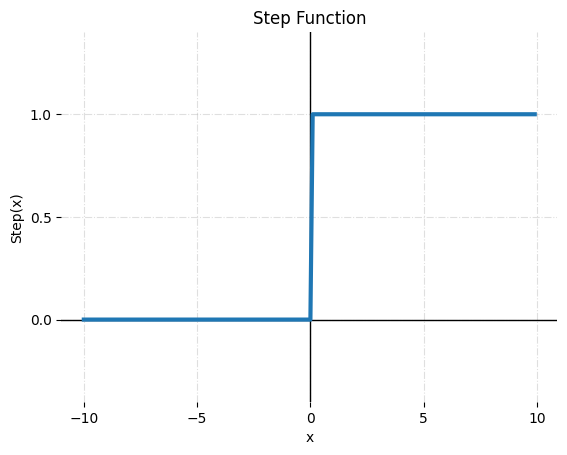

In [77]:
# plotting
plt.title('Step Function')
plt.box(on=None)
plt.ylim((-0.4, 1.4))
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.grid(alpha=0.4, ls='-.')
plt.locator_params(nbins=5)
plt.xlabel("x")
plt.ylabel("Step(x)")
plt.plot(line_x, stepfunc(line_x), lw=3)
plt.show()

In [48]:
# Compute Func values for corresponding x
print(stepfunc(value_x)) 

[0 0 1 1]


### sigmoid : 이진 분류 시,
시그모이드 함수는 이진 분류 문제에 널리 사용되는 도구로, 입력 값을 0과 1 사이의 값으로 매핑합니다. 이를 통해 출력을 **양성 클래스의 확률**을 나타내는 것으로 해석할 수 있습니다


- 인공 신경망에서 정보를 분류하는 데 사용되는 수학적 함수입니다. 
- 모든 입력을 0과 1 사이의 값에 매핑한 다음 true 또는 false로 해석할 수 있습니다.
    - 시그모이드 함수를 사용하면 0 ~ 1 사이의 연속적인 실수가 출력된다



- (사용 예) : 
    - 이미지 인식 시스템이 이미지의 개체가 고양이인지 아닌지를 결정해야 하는 경우입니다. 해당 특정 개체에 대한 시그모이드 활성화 함수의 출력이 0.5를 초과하면 "고양이와 유사한" 개체로 분류됩니다. 그렇지 않으면 그렇지 않습니다. 
- (장점) : 
    - 다른 활성화 기능에 비해 이 활성화 기능을 사용하면 **작은 변화가 결과에 너무 많은 영향을 미치지 않도록 데이터 포인트를 평활화하여 전체적으로 예측을 더욱 신뢰할 수 있다는 장점**이 있습니다. 
- (단점) : 
    - 이 함수는 **"그라데이션 소멸" 문제**가 있습니다.
- (참고) : 
    - 우리는 Sigmoid가 0과 1 사이의 값을 반환한다는 것을 알고 있습니다. 이는 특정 클래스에 속하는 데이터 포인트의 확률로 처리될 수 있습니다. 
        따라서 시그모이드는 **"이진 분류" 문제에 자주 사용**됩니다.
    - (소프트맥스 함수) : **다중 클래스 분류 문제에 사용**될 수 있습니다. 이 함수는 각 고유 클래스에 속하는 데이터 포인트의 확률을 반환합니다.

In [49]:
# Define the function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))     # 넘파이의 exp(x) 함수는 e^x를 구하는 지수 함수이다.

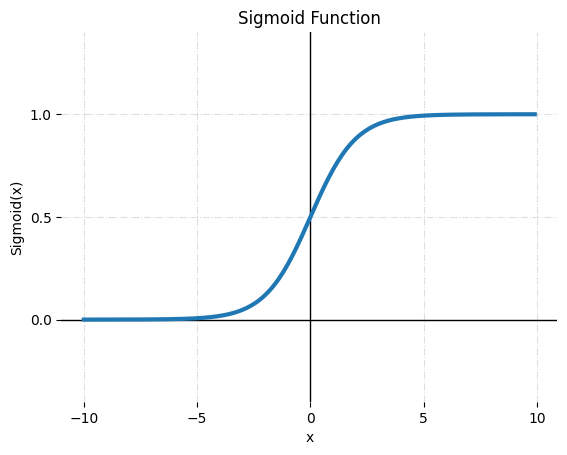

In [76]:
# plotting
plt.title('Sigmoid Function')
plt.box(on=None)
plt.ylim((-0.4, 1.4))
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.grid(alpha=0.4, ls='-.')
plt.locator_params(nbins=5)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.plot(line_x, sigmoid(line_x), lw=3)
plt.show()


# plt.plot([0,0], [1.0,-1.0], ':') # 가운데 점선 추가
# plt.axhline(y=0, color='orange', linestyle='--')

In [51]:
# Compute Func values for corresponding x
print(sigmoid(value_x)) 

[0.26894142 0.5        0.62245933 0.73105858]


### Tanh : 정확성이 중요한 딥러닝 시,
- tanh(하이퍼볼릭 탄젠트) 활성화 함수는 sigmoid 시그모이드와 유사하지만 
- sigmoid 시그모이드와 비교할 때 몇 가지 뚜렷한 차이점이 있습니다. 
    즉, Sigmoid처럼 0 또는 1이 아닌, **-1과 1 사이의 값에 입력을 매핑하는 대신 개체를 범주 기반으로 분류할 때 더 많은 뉘앙스를 허용**합니다. 
- (장점) : 
    - 네트워크에서 한 번에 고려되는 모든 기능에 대한 유사성 점수(즉, 다차원 분류). Tanh은 또한 Sigmoid 함수보다 더 나은 그래디언트 속성을 가지고 있습니다. 
    - 즉, 각 축의 곡률 효과로 인해(Sigmoid에서 생성된 것과 같은 평평한 선과 반대) 그래디언트가 왜곡이 적은 레이어를 통해 다시 전파될 수 있기 때문에 훈련 중에 더 빠른 학습 속도를 허용한다는 의미입니다. 따라서 정확성이 가장 중요한 딥 러닝에 자주 사용될 수 있다 

- (단점) :
    - 이 함수는 그라데이션 소멸 문제가 있습니다.

In [52]:
# Define the function
def tahn(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

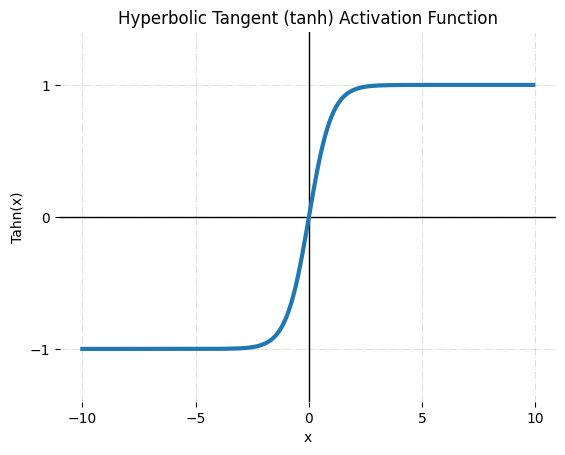

In [82]:
# plotting
plt.title('Hyperbolic Tangent (tanh) Activation Function')
plt.box(on=None)
plt.ylim((-1.4, 1.4))
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.grid(alpha=0.4, ls='-.')
plt.locator_params(nbins=5)
plt.xlabel("x")
plt.ylabel("Tahn(x)")
plt.plot(line_x, tahn(line_x), lw=3)
plt.show()

In [54]:
# Compute Func values for corresponding x
print(tahn(value_x)) 

[-0.76159416  0.          0.46211716  0.76159416]


### Softmax : 다중 클레스 분류 시,
입력이 주어지면 가능한 모든 클래스에 대한 **확률 분포를 반환**합니다. 이는 여러 객체가 하나의 이미지에 동시에 나타날 수 있는 이미지 인식과 같은 다중 클래스 분류 작업에 유용할 수 있습니다.


- Softmax 함수는 종종 다중 시그모이드의 조합으로 작성됩니다. 
- 우리는 Sigmoid가 0과 1 사이의 값을 반환한다는 것을 알고 있습니다. 이는 특정 클래스에 속하는 데이터 포인트의 확률로 처리될 수 있습니다. 따라서 시그모이드는 이진 분류 문제에 자주 사용됩니다.
- 소프트맥스 함수는 **다중 클래스 분류 문제에 사용**될 수 있습니다. 이 함수는 각 고유 클래스에 속하는 데이터 포인트의 확률을 반환합니다.


소프트맥스 함수는 분류 문제를 다룰 때 사용되는 활성화 함수이다.
- 입력받은 값들을 0 ~ 1 사이 값으로 정규화한다.
- 출력값들의 총합은 항상 1이 된다.
- 입력값 x가 n개 일 때 다음 수식으로 나타낼 수 있다.

In [79]:
# Define the function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

# 소프트맥스 함수는 입력 값을 정규화하여 합이 1이 되는 확률로 변환합니다. 일반적으로 다중 클래스 분류 작업을 위한 신경망의 출력 계층에서 활성화 함수로 사용됩니다.
# 소프트맥스 함수는 각 입력 값을 지수화하고 이를 지수화된 모든 값의 합으로 나눈 후 각 클래스에 대한 확률 값을 생성합니다.
# def softmax(x):
#     # Subtracting the maximum value for numerical stability
#     e_x = np.exp(x - np.max(x))
#     return e_x / np.sum(e_x, axis=0)

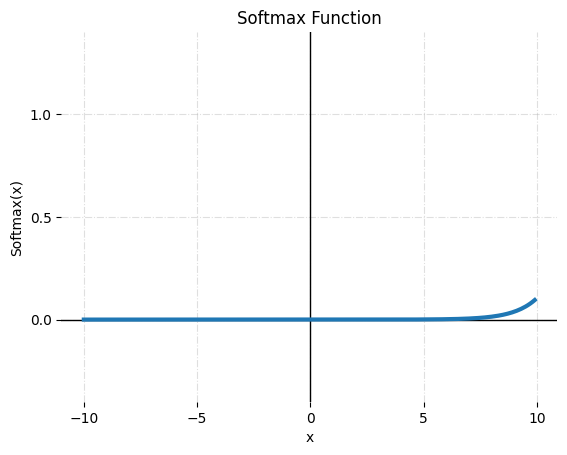

In [80]:
# plotting
plt.title('Softmax Function')
plt.box(on=None)
plt.ylim((-0.4, 1.4))
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.grid(alpha=0.4, ls='-.')
plt.locator_params(nbins=5)
plt.xlabel("x")
plt.ylabel("Softmax(x)")
plt.plot(line_x, softmax(line_x), lw=3)
plt.show()

In [84]:
# Compute Func values for corresponding x
value_s = np.array([1, 1, 2])
# [1, 1, 2]가 입력값으로 주어지면, 2에 대항하는 클래스로 분류될 확률이 57%로 가장 높다.

print(softmax(value_s)) 

[0.21194156 0.21194156 0.57611688]


#### 용도에 맞는 데이터와 그래프 세트로 조정 
소프트맥스 함수는 여러 클래스에 대한 확률 분포를 출력하므로 분류 작업의 맥락에서 일반적으로 사용됩니다. 그러나 소프트맥스 함수 자체는 값 벡터를 입력으로 사용하고 확률 벡터를 반환하므로 그래프를 그리는 것은 의미가 없습니다.

특정 예에 대한 소프트맥스 함수의 출력을 시각화하려면 각 클래스에 할당된 확률을 나타내는 막대 차트를 그릴 수 있습니다. 다음은 소프트맥스 출력에 대한 막대 차트를 그리는 Python 코드 조각의 예입니다.

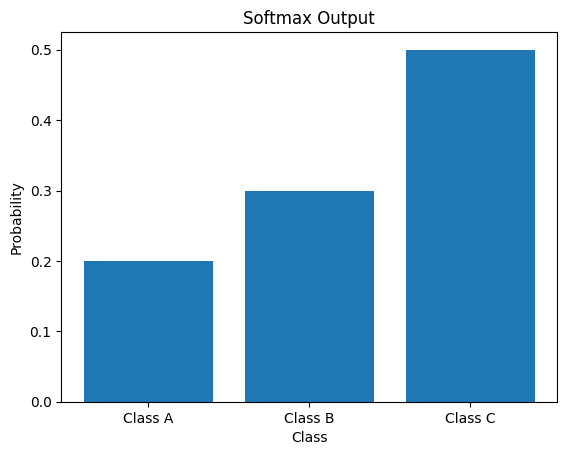

In [81]:
def plot_softmax(probabilities, class_labels):
    plt.bar(class_labels, probabilities)
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.title("Softmax Output")
    plt.show()

# Example usage:
class_labels = ["Class A", "Class B", "Class C"]
probabilities = np.array([0.2, 0.3, 0.5])
plot_softmax(probabilities, class_labels)

### ReLU (Rectified Linear Unit) : 히든 레이어의 경우,
입력의 최대값을 반환하거나 음수인 경우 0을 반환합니다.


- rectified 는 '정류된'이라는 의미로, ReLU 함수는 음수를 0으로 만든다.
- 즉, 입력이 0 이하일 경우에는 0을 출력하지만 입력이 0을 넘으면 입력 받은 값을 그대로 출력한다.


- 참고:  
    - 히든 레이어의 경우 Relu를 사용하는 것이 가장 효과적인 옵션입니다. **계산적으로 매우 효과적**입니다. 또한  값이 0보다 작은 것처럼 그래디언트 소실 문제가  발생합니다. 그러면 출력이 0이 된다는 것은 상수를 의미합니다.
    - 활성화 함수 선택에 대해 더 자세한 설명이 필요한 경우(특히 숨겨진 레이어의 경우) Relu 함수를 선택하세요.

In [65]:
# Define the function
def relu(x):
    return np.maximum(0, x)  # 인수로 주어진 수 중 가장 큰 수를 반환

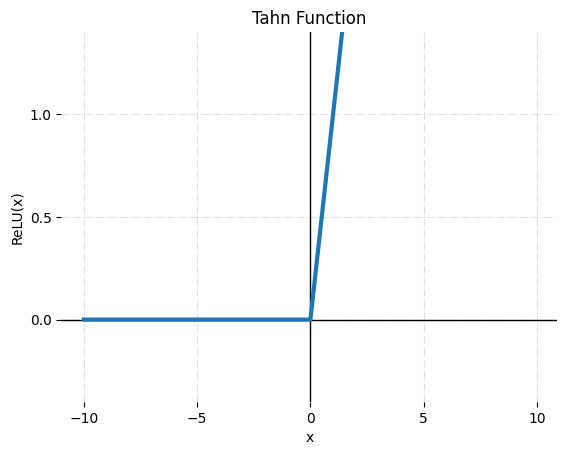

In [72]:
# plotting
plt.title('Tahn Function')
plt.box(on=None)
plt.ylim((-0.4, 1.4))
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.grid(alpha=0.4, ls='-.')
plt.locator_params(nbins=5)
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.plot(line_x, relu(line_x), lw=3)
plt.show()

In [67]:
# Compute Func values for corresponding x
print(relu(value_x)) 

[0.  0.  0.5 1. ]


### Leaky Relu 
Leaky Relu는 ReLU의 변형입니다. 


Leaky ReLU라는 변형은 음수 값이 발견될 때 입력 또는 작은 양수 상수를 곱한 입력을 반환하여 뉴런이 항상 0을 출력하는 것을 방지합니다.


- (z < 0)인 경우, 
    - **0이 되는 대신** 
    - Leaky ReLU는 **0이 아닌 작은 상수 기울기 α(일반적으로 α = 0.01)를 허용합니다.**

In [68]:
# Define the function
def leaky_relu(x, alpha=0.1):
    return np.where(x >= 0, x, alpha * x)

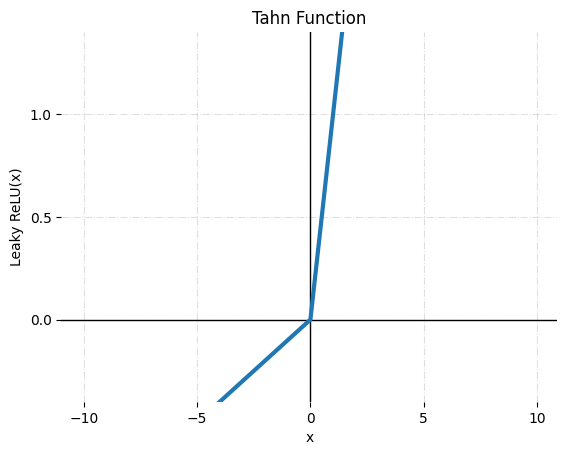

In [71]:
# plotting
plt.title('Tahn Function')
plt.box(on=None)
plt.ylim((-0.4, 1.4))
plt.axhline(lw=1, c='black')
plt.axvline(lw=1, c='black')
plt.grid(alpha=0.4, ls='-.')
plt.locator_params(nbins=5)
plt.xlabel("x")
plt.ylabel("Leaky ReLU(x)")
plt.plot(line_x, leaky_relu(line_x), lw=3)
plt.show()

In [70]:
# Compute Func values for corresponding x
print(relu(value_x)) 

[0.  0.  0.5 1. ]


**용도별 활성함수 사용 예**
- 고려 사항	: 활성화 기능
- 비선형성	: 시그모이드, Tanh, ReLU, Leaky ReLU, ELU, SELU
- 파생 가능성	: 시그모이드, Tanh, ReLU, Leaky ReLU, ELU, SELU
- 출력값의 범위	: 시그모이드, 소프트맥스
- 계산 효율성	: ReLU, Leaky ReLU, ELU, SELU
- 포화	: ReLU, Leaky ReLU, ELU, SELU

**정리**
- 네트워크가  이진 분류 에 사용되는 경우, 출력 범위가 0에서 1 사이인 시그모이드 함수가 적합합니다.
- 다중 클래스 분류의 경우  -Softmax 활성화 함수.
- 이상 탐지, 추천 시스템 또는 강화 학습과 같은 다른 작업의 경우   문제의 세부 사항에 따라 ReLU 또는 tanh 함수와 같은 다른 활성화 함수를 사용할 수 있습니다.
- 시그모이드 및 tanh와 같은 일부 활성화 함수는 **극단값에서 포함되어 학습 속도가 느려질 수 있습니다. 그러한 경우에는 ReLU와 같이 포화되지 않는 함수를 사용하는 것이 더 나을 수도 있습니다.**
- 히든 레이어 의 경우, 최선의 선택은 ReLU입니다.

**정리2**
- S자형 곡선을 갖는 시그모이드 활성화 함수는 일반적으로 이진 분류 문제 및 계단 함수의 매끄러운 근사로 사용됩니다. 
- 시그모이드와 유사한 쌍곡선 탄젠트(tanh) 함수는 입력을 -1과 1 사이의 범위로 매핑하므로 특정 유형의 네트워크에 유용합니다. 
- 음수 값을 0으로 설정하는 ReLU(Rectified Linear Unit) 함수는 딥러닝 아키텍처의 단순성과 효율성으로 인해 널리 사용됩니다. 
- Leaky ReLU는 음수 입력에 대해 작고 0이 아닌 기울기를 제공하여 "죽어가는 ReLU" 뉴런 문제를 해결합니다. 
- 반면 Softmax는 다중 클래스 분류 작업에 사용되어 여러 클래스에 대한 확률 분포를 생성합니다.

## 활성함수 모음집 

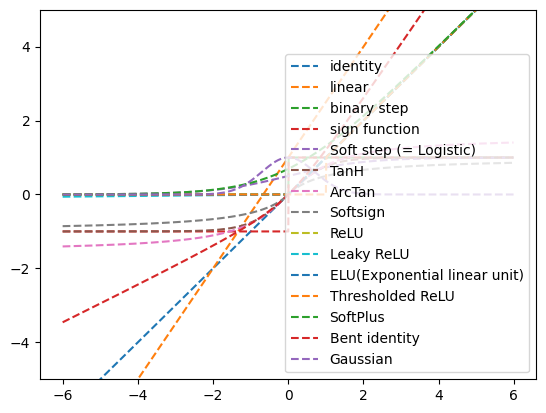

In [83]:
import numpy as np
import matplotlib.pylab as plt
 
x = np.arange(-6, 6, 0.01)
 
 
#######################################################
# 선형함수들
#######################################################
def identity_func(x): # 항등함수
    return x
 
#그래프 출력
plt.plot(x, identity_func(x), linestyle='--', label="identity")
 
 
def linear_func(x): # 1차함수
    return 1.5 * x + 1 # a기울기(1.5), Y절편b(1) 조정가능
 
#그래프 출력
plt.plot(x, linear_func(x), linestyle='--', label="linear")
 
 
#######################################################
# 계단함수들
#######################################################
def binarystep_func(x): # 계단함수
    return (x>=0)*1
    # return np.array(x>=0, dtype = np.int) # same result
 
    # y = x >= 0
    # return y.astype(np.int) # Copy of the array, cast to a specified type.
    # same result
 
#그래프 출력
plt.plot(x, binarystep_func(x), linestyle='--', label="binary step")
 
 
def sgn_func(x): # 부호함수(sign function)
    return (x>=0)*1 + (x<=0)*-1
 
#그래프 출력
plt.plot(x, sgn_func(x), linestyle='--', label="sign function")
 
 
#######################################################
# Sigmoid계열
#######################################################
 
def softstep_func(x): # Soft step (= Logistic), 시그모이드(Sigmoid, S자모양) 대표적인 함수
    return 1 / (1 + np.exp(-x))
 
#그래프 출력
plt.plot(x, softstep_func(x), linestyle='--', label="Soft step (= Logistic)")
 
def tanh_func(x): # TanH 함수
    return np.tanh(x)
    # return 2 / (1 + np.exp(-2*x)) - 1 # same
 
#그래프 출력
plt.plot(x, tanh_func(x), linestyle='--', label="TanH")
 
 
def arctan_func(x): # ArcTan 함수
    return np.arctan(x)
 
#그래프 출력
plt.plot(x, arctan_func(x), linestyle='--', label="ArcTan")
 
 
def softsign_func(x): # Softsign 함수
    return x / ( 1+ np.abs(x) )
 
#그래프 출력
plt.plot(x, softsign_func(x), linestyle='--', label="Softsign")
 
 
 
#######################################################
# ReLU계열
#######################################################
 
def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return (x>0)*x
    # return np.maximum(0,x) # same
 
#그래프 출력
plt.plot(x, relu_func(x), linestyle='--', label="ReLU")
 
 
def leakyrelu_func(x): # Leaky ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return (x>=0)*x + (x<0)*0.01*x # 알파값(보통 0.01) 조정가능
    # return np.maximum(0.01*x,x) # same
 
#그래프 출력
plt.plot(x, leakyrelu_func(x), linestyle='--', label="Leaky ReLU")
 
 
def elu_func(x): # ELU(Exponential linear unit)
    return (x>=0)*x + (x<0)*0.01*(np.exp(x)-1)
 
#그래프 출력
plt.plot(x, elu_func(x), linestyle='--', label="ELU(Exponential linear unit)")
 
 
def trelu_func(x): # Thresholded ReLU
    return (x>1)*x # 임계값(1) 조정 가능
 
#그래프 출력
plt.plot(x, trelu_func(x), linestyle='--', label="Thresholded ReLU")
 
 
 
#######################################################
# 기타계열
#######################################################
 
def softplus_func(x): # SoftPlus 함수
    return np.log( 1 + np.exp(x) )
 
#그래프 출력
plt.plot(x, softplus_func(x), linestyle='--', label="SoftPlus")
 
 
def bentidentity_func(x): # Bent identity
    return (np.sqrt(x*x+1)-1)/2+x
 
#그래프 출력
plt.plot(x, bentidentity_func(x), linestyle='--', label="Bent identity")
 
 
def gaussian_func(x): # Gaussian
    return np.exp(-x*x)
 
#그래프 출력
plt.plot(x, gaussian_func(x), linestyle='--', label="Gaussian")
 
#plt.plot(x, y_identity, 'r--', x, relu_func(x), 'b--', x, softstep_func(x), 'g--')
plt.ylim(-5, 5)
plt.legend()
plt.show()
 

**참고 레퍼런스** 
- https://happy-obok.tistory.com/55
- https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
- https://medium.com/@kmkgabia/ml-sigmoid-%EB%8C%80%EC%8B%A0-relu-%EC%83%81%ED%99%A9%EC%97%90-%EB%A7%9E%EB%8A%94-%ED%99%9C%EC%84%B1%ED%99%94-%ED%95%A8%EC%88%98-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-c65f620ad6fd 
- https://latte-is-horse.tistory.com/32 
- https://www.shiksha.com/online-courses/articles/activation-functions-with-real-life-analogy-and-python-code/

#### 지속적으로 업데이트되는 활성화 함수 목록을 찾을 수 있습니다.
- https://paperswithcode.com/method/leaky-relu 